# [SWCON253] Machine Learning
Teaching Assistant: Hyundong Cho (gusehd1113@khu.ac.kr)

Professor: Jinwoo Choi (jinwoochoi@khu.ac.kr)

---

# P4.A:  SVM을 이용하여 선형 분류 (8점)

### 학습목표
- SVM 모델을 이용하여 선형 분류 가능한 데이터를 분류하는 분류기를 학습 할 수 있다.
- Scikit-Learn을 이용하여 모델 학습, 검증 과정을 구현할 수 있다.

### 실습내용
Scikit-Learn의 SVM을 이용하여 선형 분류가 가능한 데이터셋을 분류하는 분류기를 학습해봅니다. 

실습은 다음 순서로 진행됩니다.
- 1) 주어진 데이터셋 loading
- 2) SVM 모델 구현, 학습 **<직접 구현>**
- 3) SVM 모델 검증
- 4) Decision Boundary 시각화 
- 5) SVM with soft margin **<직접 구현>**
- 6) Discussion

**이번 실습에서 여러분은 `2), 5)` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- SVM 모델 작성: 8점
- 본 실습과제에서는 Discussion 성실도에 따른 감점 최대 2점

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## Imports

No module named 'sklearn' 에러 발생 시 `conda install scikit-learn` 명령어를 통해 scikit-learn 패키지를 설치해주시기 바랍니다. 

In [68]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Loading the Dataset
코드를 실행시켜 실습코드와 같이 첨부된 dataset.csv파일을 로드합니다.

In [70]:
# CSV 파일을 읽기
X, y = [], []

with open('./dataset.csv', 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(int(values[-1]))
        
print(len(X), len(y))

112 112


### Dataset Split & Visualization
Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [72]:
import random


# 랜덤시드 설정
random.seed(1234)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 80개 까지는 학습용으로 뒤 20개는 테스트용으로 split
X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

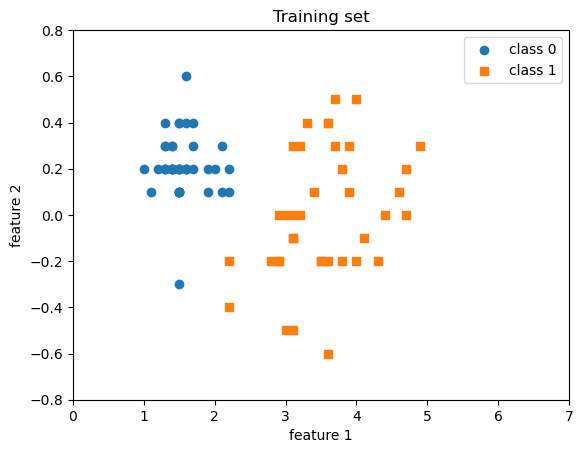

In [73]:
# 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## 2) SVM 모델 구현, 학습
이 부분에서는 Scikit-Learn의 SVC 모듈의 **linear** 커널을 이용하여 선형 SVM모델을 선언하고 학습합니다.

여기서 사용하는 SVC 클래스는 C-Support Vector Classification으로 SVM을 사용한 분류기 모델입니다.

SVC class에서는 kernel 파라미터를 이용하여 사용하는 커널의 형태를 변경할 수 있습니다. 이번 실습에서는 **'linear'(선형)** 커널을 사용한 선형 SVM을 이용합니다.

아래 `# <your code>` 부분을 채워 넣어서 코드를 직접 구현하세요.

**세부 구현 사항:**
- kernel은 'linear'
- Hard margin을 사용하기 위해 하이퍼파라미터 C=100으로 설정

**유의사항:**
- SVC 모듈의 하이퍼파라미터인 C는 강의 시간에 배운 하이퍼파라미터 C와 유사하나, SVC 모듈의 경우 C가 커질 수록 Hard margin에 가까워짐
- 자세한 설명(하이퍼파라미터, 학습방법)은 scikit-learn의 공식 document를 참조 바랍니다. 
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

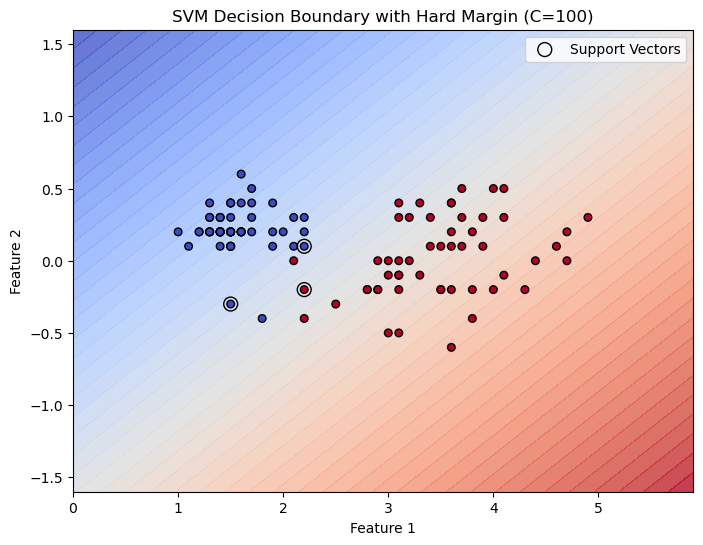

In [75]:
# 데이터가 리스트일 경우 NumPy 배열로 변환
X = np.array(X)
y = np.array(y)

# SVM 모델 생성 및 학습
svm = SVC(kernel='linear', C=100)
svm.fit(X_train, y_train)

# 결정 경계 시각화
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
)

# decision_function은 fit 이후에만 호출 가능
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label="Support Vectors")
plt.title("SVM Decision Boundary with Hard Margin (C=100)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## 3) 모델 검증
Training set과 Test set각각에서 모델의 accuracy를 계산합니다.

In [77]:
# Train dataset에서 성능 검증
train_acc = sum(svm.predict(X_train) == y_train) / len(y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))
# Test dataset에서 성능 검증
test_acc = sum(svm.predict(X_test) == y_test) / len(y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Train set accuracy: 100.00%
Test set accuracy: 93.75%


## 4) Decision Boundary
train 데이터셋과 test 데이터셋 각각을 이용하여 2개의 scatter plot을 그리고 그 위에 학습된 가중치를 이용하여 결정경계를 시각화합니다.

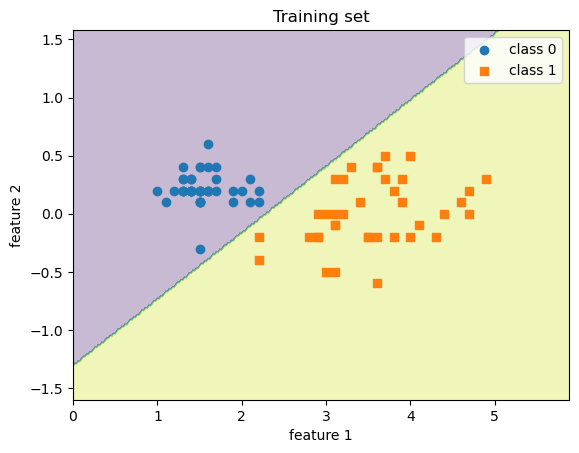

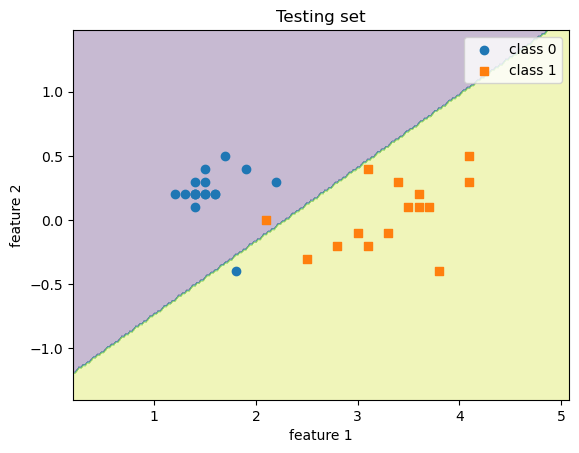

In [79]:
### 데이터셋에서 Decision Boundary 시각화
X_train = np.array(X_train)
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# Decision Boundary를 표시하기 위해
# x1_min부터 x1_max까지 0.02간격으로, x2_min부터 x2_max까지 0.02간격의 모든 점의 좌표를 반환
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # predict all datapoint from mashgrid
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3) # 범위를 색으로 표시

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

# 그래프로 표현
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()


### Test 데이터셋에서 Decision Boundary 시각화
X_test = np.array(X_test)
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
# 그래프로 표현
plt.title('Testing set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## 5) SVM with soft margin

위에서 실습한 선형 SVM 모델은 hard margin을 사용했습니다.이번에는 soft margin을 사용하여 학습 및 검증을 진행해 봅니다.

**세부 구현 사항:**
- kernel은 'linear'
- Soft margin을 사용하기 위해 하이퍼파라미터 C=0.05으로 설정

Train set accuracy: 97.50%
Test set accuracy: 96.88%


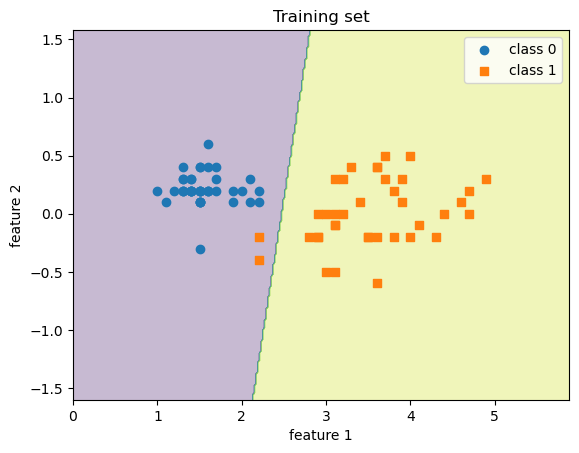

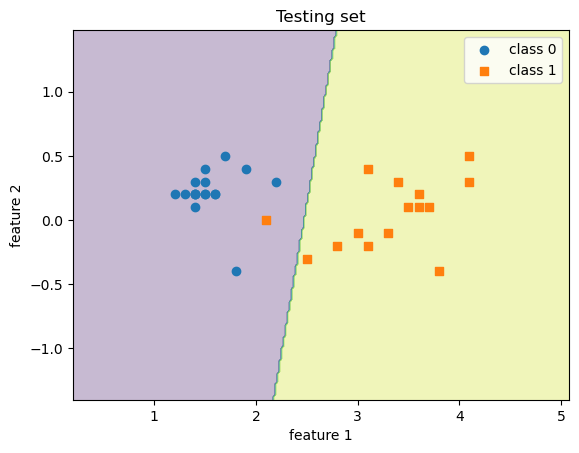

In [81]:
# Soft Margin SVM 모델 생성 및 학습
svm = SVC(kernel='linear', C=0.05)
svm.fit(X_train, y_train)

# Train dataset에서 성능 검증
train_acc = sum(svm.predict(X_train) == y_train) / len(y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))
# Test dataset에서 성능 검증
test_acc = sum(svm.predict(X_test) == y_test) / len(y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

### 데이터셋에서 Decision Boundary 시각화
X_train = np.array(X_train)
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# Decision Boundary를 표시하기 위해
# x1_min부터 x1_max까지 0.02간격으로, x2_min부터 x2_max까지 0.02간격의 모든 점의 좌표를 반환
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # predict all datapoint from mashgrid
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3) # 범위를 색으로 표시

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')
# 그래프로 표현
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()


### Test 데이터셋에서 Decision Boundary 시각화
X_test = np.array(X_test)
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 0], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 0],
            label='class 0', marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1], 
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 1', marker='s')
# 그래프로 표현
plt.title('Testing set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## 6) Discussion

**1) 이전 실습에서 사용된 Perceptron 과 SVM의 차이점에 대해 설명해보세요.**

[답변작성] perceptron은 입력층 1층과 출력층 1층으로 구성되어 있고, 활성함수를 적용하여 데이를 분류합니다. 따라서 선형 분류만 가능한 경우에만 동작합니다. perceptron의 식은 아래와 같습니다.     
$$
L = - \sum_{i} y_i (\mathbf{w}^T \mathbf{x}_i + b)
$$
SVM은 선형이 아닌 데이터에도 사용할 수 있으며, 여백을 통해서 일반화 능력을 향상시킵니다. 데이터가 결정경계에서 정확히 분리되지 않아도 가능한 방법(soft margin)이 있습니다. 따라서 perceptron보다 더 다양한 데이터에 사용이 가능합니다. 

**2) 선형 SVM에서의 hard margin과 soft margin의 차이를 설명하고, 본 실습 결과를 바탕으로 주어진 데이터셋에 더 적절한 방법은 무엇인지 설명하세요.**

[답변작성]

Hard margin은 모든 sample이 margin의 외부에 있도록 support vector를 통해 경계를 만듭니다. 그러므로 선형 분리가 가능해야 합니다. outlier가 존재하는 경우에는 부정확한 결과를 나타낼 수 있습니다.
라그랑주 식을 통해서 계산할 수 있고, 아래 식을 통해 계신합니다.         
$$
\text{Minimize: } \frac{1}{2} \|\mathbf{w}\|^2
$$
$$
\text{Subject to: } y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1 \, \forall i
$$

soft margin은 데이터의 margin의 내부에 sample이 존재하는 것을 허용하고 margin을 만듭니다. 일부 데이터가 잘못된 분류가 되는 것을 허용하여 분류를 하도록 합니다. hard margin에서 에타를 추가하여 margin을 변화시키고 case를 하나로 표현할 수 있도록 합니다. 
아래 식을 통해 계산합니다. 
$$
\text{Minimize: } \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i} \xi_i
$$
$$
\text{Subject to: } y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i, \, \xi_i \geq 0 \, \forall i
$$

위의 데이터셋의 경우 hard margin의 test accuracy는 93.75%이고 soft margin의 test accuracy는 96.88%이기 때문에 soft margin의 방법이 훨씬 더 적합하다고 할 수 있습니다. 
(추가로 hard margin의 train accuracy는 100%인 것으로 보아 과적합이 발생한 것으로 추측할 수 있습니다.)


---

# P4.B:  SVM을 이용하여 비선형 분류 (7점)

### 학습목표
- SVM 모델을 이용하여 **선형 분류 불가능**한 데이터를 분류하는 분류기를 학습 할 수 있다.
- Scikit-Learn을 이용하여 모델 학습, 검증 과정을 구현할 수 있다.

### 실습내용
Scikit-Learn의 SVM을 이용하여 선형 분류가 불가능한 데이터셋을 분류하는 분류기를 학습해봅니다. 

실습은 다음 순서로 진행됩니다.
- 1) 데이터셋 loading
- 2) SVM 모델 구현, 학습, 검증, Decision Boundary 시각화 **<직접 구현>**
- 3) Discussion

**이번 실습에서 여러분은 `2) SVM 모델 구현, 학습, 검증, Decision Boundary 시각화` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- Trainset과 Testset 정확도 95% 이상: 7점
- Trainset과 Testset 정확도 94% 이상: 6점
- Trainset과 Testset 정확도 93% 이상: 5점
- 본 실습과제에서는 Discussion 성실도에 따른 감점 최대 2점


`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

In [89]:
import os
import numpy as np
import matplotlib.pyplot as plt

## 1) 데이터셋 loading

In [91]:
# CSV 파일을 읽기
dataset = np.loadtxt("xor_dataset.csv", delimiter=",")
X = dataset[:, :2]
y = dataset[:, 2].astype(int)
print(len(X), len(y))

200 200


### Dataset Split, 시각화

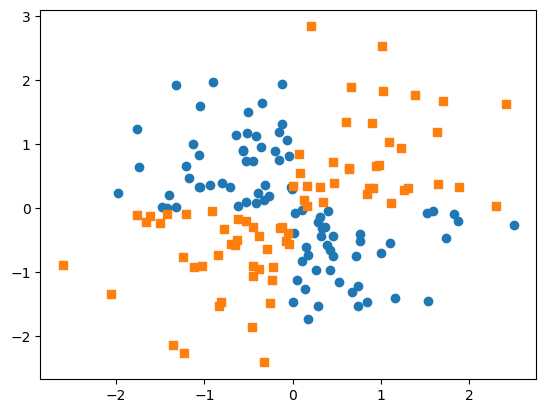

In [93]:
# 랜덤시드 설정
random.seed(123)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 160개 까지는 학습용으로 뒤 40개는 테스트용으로 split
X_train = [X[i] for i in idx[:160]]
y_train = [y[i] for i in idx[:160]]
X_test = [X[i] for i in idx[160:]]
y_test = [y[i] for i in idx[160:]]

# 데이터셋 plot
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == -1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == -1],
            marker='s')
plt.show()

## 2) SVM 모델 구현, 학습, 검증

비선형 커널을 사용하는 SVM모델을 이용하여 위 데이터셋을 분류하는 분류기를 학습합니다.

- 선형 SVM 모델과 동일하게 SVC 모듈을 사용하지만, 'kernel' 파라미터를 조절하여 비선형 SVM 모델을 구현합니다.

### 선형 불가능한 문제
![](https://blog.kakaocdn.net/dn/1hyfi/btqwdhw53hZ/s33aTg9XF2ZDnoPkKs4IT0/img.png)

위 그림은 선형분리가 불가능한 데이터셋을 어떻게 커널 SVM이 분류하게 하는지 보여줍니다.
위 데이터셋은 2차원 평명상에서는 선형 분리가 불가능하지만, 오른쪽 처럼 3차원에서 보면 한 평면으로 분리가 가능합니다.
여기서 커널은 2차원 데이터를 3차원으로 매핑하는 함수를 의미하며, 커널의 모양에 따라 linear(선형), poly(다항), rbf(가우시안), sigmoid(시그모이드) 등으로 구분됩니다.
3차원상의 데이터를 구분하는 평면을 결정 평면이라고 합니다. 

그러나 커널은 단순히 2차원 데이터를 3차원으로 만 매핑하는것이 아니라 n차원 데이터를 n차원보다 높음 m차원으로 매핑 할 수 있습니다.
따라서 3차원 이상의 차원에서의 결정 경계를 결정 초평면이라고합니다.

정리하자면 커널 SVM은 다음과정을 통해 학습됩니다.
- 1) 커널함수를 이용해 데이터를 초공간으로 매핑
- 2) 매핑된 초공간에서 margin이 최대화 되는 결정 초평면 탐색

하지만 커널함수를 모든 데이터셋에 적용하게 되면 데이터셋이 커질수록 계산복잡도가 증가하게 됩니다. 따라서 우리는 모든 데이터셋에 적용하는것이 아니라 꼼수(Trick)을 써서 커널함수를 적용하게 됩니다. 이를 커널 트릭(Kernel Trick)이라고 합니다.

**더 읽을 거리**
- [커널 함수와 커널 트릭](https://en.wikipedia.org/wiki/Kernel_method)

본 실습에서 제공하는 데이터는 선형커널로는 분류가 불가능합니다. 위에서 설명한 커널들로 아래 코드를 변경하면서 **최적의 커널 및 하이퍼파라메터**를 찾아보세요.

사용가능한 파라미터는 다음과 같습니다.
- **kernel**: 'rbf', 'poly', 'sigmoid' 등의 커널 종류를 선택합니다.
- **C**: 규제 파라미터로서 값이 작을 수록 찾아지는 결정 경계의 마진이 커집니다.
- **gamma**: rbf, poly, sigmoid 커널에 사용되는 값으로 커널의 영향력을 나타냅니다. 값이 커질 수록 커널의 영향력이 커저 결정경계는 더 샘플에 가까워지고 구불구불하게 됩니다.

이외의 파라미터는 오른쪽 사이트를 참고하세요.
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Train set accuracy: 98.12%
Test set accuracy: 97.50%


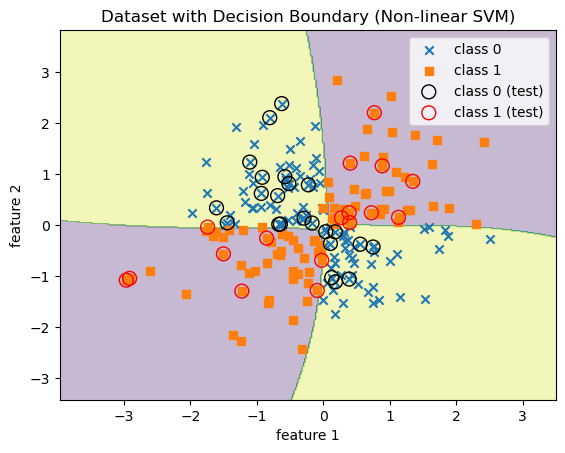

In [98]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# SVC module for Non-linear SVM
svm = SVC(kernel='rbf', C=200, gamma=0.1)  # 비선형 SVM (RBF 커널)

# Training with train dataset
svm.fit(X_train, y_train)

# Train dataset에서 성능 검증
train_acc = sum(svm.predict(X_train) == y_train) / len(y_train)
print('Train set accuracy: %.2f%%' % (train_acc * 100))

# Test dataset에서 성능 검증
test_acc = sum(svm.predict(X_test) == y_test) / len(y_test)
print('Test set accuracy: %.2f%%' % (test_acc * 100))

# 데이터셋에서 Decision Boundary 시각화
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

# Decision boundary 계산
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3)  # Decision boundary 표시

# Train 데이터 포인트 시각화
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 1], 
            [i[1] for idx, i in enumerate(X) if y[idx] == 1],
            label='class 0', marker='x')
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == -1], 
            [i[1] for idx, i in enumerate(X) if y[idx] == -1],
            label='class 1', marker='s')

# Test 데이터 강조 (테두리로 구분)
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == 1],
            label='class 0 (test)', facecolors='none', edgecolor='black', s=100, marker='o')
plt.scatter([i[0] for idx, i in enumerate(X_test) if y_test[idx] == -1],
            [i[1] for idx, i in enumerate(X_test) if y_test[idx] == -1],
            label='class 1 (test)', facecolors='none', edgecolor='red', s=100, marker='o')

# 그래프 설정
plt.title('Dataset with Decision Boundary (Non-linear SVM)')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()


## 3) Discussion

**1) 학습, 테스트 정확도는 얼마인가요? (위 숫자를 복사하세요.)**

- Training: 98.12%
- Test: 97.50%

**2) 본 실습에서 최종적으로 사용한 커널은 무엇인지 쓰고, 다른 커널들과 비교했을 때의 장단점(각 커널의 특성을 고려하여)을 설명하세요.**

[답변작성] 
RBF는 가우시안 커널로, 데이터 간의 거리를 기반으로 변환을 수행합니다. 
비선형 분포를 가진 데이터에서도 다른 커널들보다 정확도가 다른 커널에 비해 높고, 감마라는 하이퍼 파라미터를 이용해서 커널의 영향을 조절할 수 있다는 장점이 있습니다. 
$$
K(x_1, x_2) = \exp\left(-\gamma \| x_1 - x_2 \|^2\right)
$$

위와 같은 식을 통해서 계산하고 감마 값이 클수록 가까운 데이터 간의 유사성이 증가하고 거리가 먼 데이터는 유사성을 낮게 계산합니다.
다만 데이터가 많은 경우에 계산하기 힘들며 감마를 찾기 위하 과정에서 추가적인 작업이 필요합니다. 

sigmoid 커널은 퍼셉트론과 유사한 방식으로 동작합니다. MLP와 유사한 방식으로 하이퍼볼릭 탄젠트 형태를 가지고 있어서 확률적 해석을 도입하는 경우에 사용가능합니다. 신경망과 유사하여 비선형 분류를 하는데도 사용할 수 있고, RBF에 비해서 간단하다는 장점이 있습니다. 또한 데이터셋이 작은 경우 더 효율적일 수 있습니다. 
$$
K(x_1, x_2) = \tanh(\alpha \langle x_1, x_2 \rangle + c)
$$

다만, 퍼셉트론에서 발생한 것 처럼 데이터에 따라 과적합이 발생할 수 있다는 단점이 있습니다. 

polynomial 커널은 다항식의 형태로 되어있는 커널입니다. d라는 차수의 다항식 경계를 학습하는 형태를 가지고 있습니다. 따라서 데이터셋이 다항식 형태의 경계인 경우 효과적으로 잘 분류할 수 있다는 장점이 있습니다. 데이터셋이 나누기 쉬운 간단한 다항식일 경우에는 계산을 효율적으로 할 수 있습니다. 
$$
K(x_1, x_2) = (\alpha \langle x_1, x_2 \rangle + c)^d
$$
다만 d가 높아질 경우 다항식의 특성상 계산이 복잡하여 메모리를 훨씬 더 많이 사용해야합니다. 
높은 차수일 경우에 발생하는 과적합이 나타날 수 있다는 단점이 존재합니다. 